In [159]:
import numpy as np
import wave
import struct
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (15, 6)
import os

In [160]:
def saveAudioFile(filename, data, amplitude=16000, sampling_rate=48000.0, num_samples=48000):
    comptype="NONE"
    compname="not compressed"
    nchannels=1
    sampwidth=2
    wav_file = wave.open(os.path.join('data', filename), 'w')
    wav_file.setparams((nchannels, sampwidth, int(sampling_rate), num_samples, comptype, compname))
    for s in data:
        wav_file.writeframes(struct.pack('h', int(s*amplitude)))

In [189]:
# Noise signal

freq_noise = 50
freq_sig = 1000
freq_noise_2 = 150

sampling_rate = 48000.0
seconds = 1

num_samples = int(sampling_rate * seconds)
amplitude = 16000

sine_noise = [np.sin(2 * np.pi * freq_noise * x1/sampling_rate) for x1 in range(num_samples)]
sine_sig = [np.sin(2 * np.pi * freq_sig * x1/sampling_rate) for x1 in range(num_samples)]

sine_noise_2 = [np.sin(2 * np.pi * freq_noise_2 * x1/sampling_rate) for x1 in range(num_samples/2)]

while len(sine_sig) != len(sine_noise_2):
    sine_noise_2.append(0)


sine_sig = np.array(sine_sig)
sine_noise = np.array(sine_noise)
sine_noise_2 = np.array(sine_noise_2)

print len(sine_sig)

sine_sig = sine_sig * 1600
sine_noise = sine_noise * 500

print len(sine_sig)

48000
48000


In [190]:
combined_signal = sine_sig + sine_noise + sine_noise_2

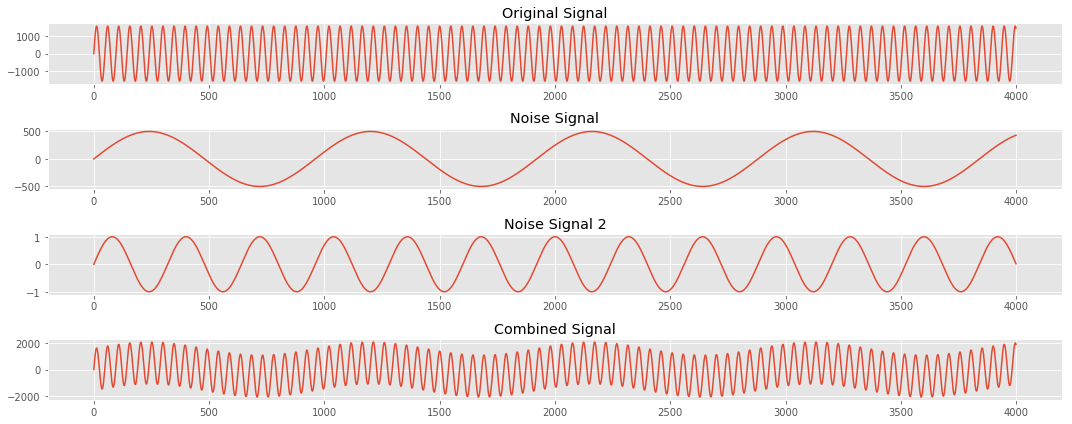

In [191]:
plt.subplot(4, 1, 1)
plt.plot(sine_sig[:4000])
plt.title('Original Signal')

plt.subplot(4, 1, 2)
plt.plot(sine_noise[:4000])
plt.title('Noise Signal')

plt.subplot(4, 1, 3)
plt.plot(sine_noise_2[:4000])
plt.title('Noise Signal 2')

plt.subplot(4, 1, 4)
plt.plot(combined_signal[:4000])
plt.title('Combined Signal')

plt.tight_layout()
plt.show()

In [192]:
combined_fft = np.fft.fft(combined_signal)
combined_freq = np.abs(combined_fft)

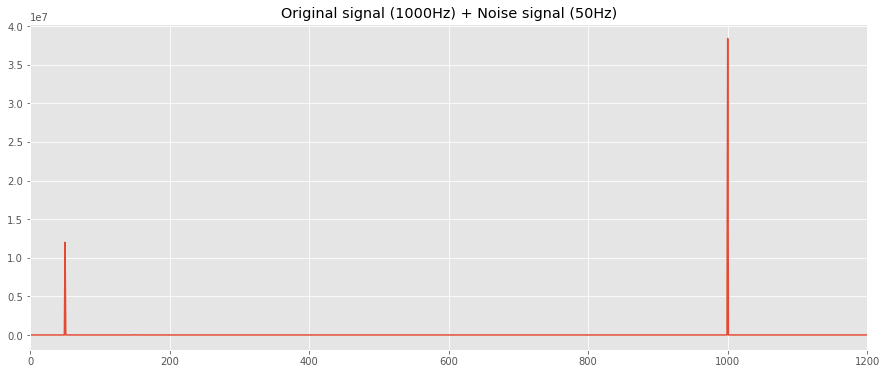

In [193]:
plt.plot(combined_freq)
plt.title('Original signal (1000Hz) + Noise signal (50Hz)')
plt.xlim(0, 1200)
plt.show()

In [166]:
saveAudioFile('SignalWithNoise.wav', combined_signal)

error: short format requires SHRT_MIN <= number <= SHRT_MAX